#**Final Project - Project Based Internship Data Scientist**

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

dataset_paths = [
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/HomeCredit_columns_description.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/POS_CASH_balance.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/application_test.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/application_train.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/bureau.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/bureau_balance.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/credit_card_balance.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/installments_payments.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/previous_application.csv",
    "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/sample_submission.csv"
]

for dataset_path in dataset_paths:
    try:
        print(f"--- Information for: {os.path.basename(dataset_path)} ---")
        # Attempt to read the CSV with different encodings if utf-8 fails
        try:
            df = pd.read_csv(dataset_path, encoding='utf-8')
        except UnicodeDecodeError:
            print("UTF-8 decoding failed, trying 'latin-1' encoding...")
            df = pd.read_csv(dataset_path, encoding='latin-1')

        df.info()
        print("\n") # Add a newline for better separation
    except FileNotFoundError:
        print(f"Error: The file was not found at {dataset_path}")
    except Exception as e:
        print(f"An error occurred while processing {os.path.basename(dataset_path)}: {e}")

--- Information for: HomeCredit_columns_description.csv ---
UTF-8 decoding failed, trying 'latin-1' encoding...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


--- Information for: POS_CASH_balance.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   objec

In [ ]:
import pandas as pd

train_dataset_path = "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/application_train.csv"

try:
    df_train = pd.read_csv(train_dataset_path)

    missing_values = df_train.isnull().sum()

    missing_percentage = (missing_values / len(df_train)) * 100

    print("Percentage of Missing Values in application_train.csv:")
    print(missing_percentage.sort_values(ascending=False))

except FileNotFoundError:
    print(f"Error: The file was not found at {train_dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Percentage of Missing Values in application_train.csv:
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
FLAG_DOCUMENT_16             0.000000
FLAG_DOCUMENT_15             0.000000
FLAG_DOCUMENT_14             0.000000
FLAG_DOCUMENT_20             0.000000
FLAG_DOCUMENT_21             0.000000
Length: 122, dtype: float64


In [ ]:
print("Distribution of the 'TARGET' column:")
print(df_train['TARGET'].value_counts(normalize=True))

Distribution of the 'TARGET' column:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [ ]:
test_dataset_path = "/content/drive/MyDrive/GOOGLE ONE RIGAN/HOME CREDIT/application_test.csv"

try:
    df_test = pd.read_csv(test_dataset_path)

    missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

    columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()

    df_train_cleaned = df_train.drop(columns=columns_to_drop)
    df_test_cleaned = df_test.drop(columns=columns_to_drop)

    print("Jumlah kolom sebelum dibuang:", df_train.shape[1])
    print("Jumlah kolom yang dibuang:", len(columns_to_drop))
    print("Jumlah kolom setelah dibuang:", df_train_cleaned.shape[1])
    print("\nKolom yang dibuang:")
    print(columns_to_drop)

except FileNotFoundError:
    print(f"Error: The file was not found at {test_dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Jumlah kolom sebelum dibuang: 122
Jumlah kolom yang dibuang: 41
Jumlah kolom setelah dibuang: 81

Kolom yang dibuang:
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

numerical_cols = df_train_cleaned.select_dtypes(include=np.number).columns.tolist()

numerical_features = [col for col in numerical_cols if col not in ['TARGET', 'SK_ID_CURR']]

categorical_features = df_train_cleaned.select_dtypes(include='object').columns.tolist()

imputer_numerical = SimpleImputer(strategy='median')

imputer_categorical = SimpleImputer(strategy='most_frequent')

df_train_cleaned[numerical_features] = imputer_numerical.fit_transform(df_train_cleaned[numerical_features])
df_train_cleaned[categorical_features] = imputer_categorical.fit_transform(df_train_cleaned[categorical_features])

df_test_cleaned[numerical_features] = imputer_numerical.transform(df_test_cleaned[numerical_features])
df_test_cleaned[categorical_features] = imputer_categorical.transform(df_test_cleaned[categorical_features])

print("--- Pengecekan Setelah Imputasi ---")
print("Jumlah data kosong di Training Set:", df_train_cleaned.isnull().sum().sum())
print("Jumlah data kosong di Test Set:", df_test_cleaned.isnull().sum().sum())

--- Pengecekan Setelah Imputasi ---
Jumlah data kosong di Training Set: 0
Jumlah data kosong di Test Set: 0


##**Fase Selanjutnya: Membuat Data Menjadi 'Pintar' (Feature Engineering)**

In [ ]:
print("Jumlah kolom sebelum One-Hot Encoding:", df_train_cleaned.shape[1])

df_train_encoded = pd.get_dummies(df_train_cleaned, drop_first=True)
df_test_encoded = pd.get_dummies(df_test_cleaned, drop_first=True)

train_labels = df_train_encoded['TARGET']
train_ids = df_train_encoded['SK_ID_CURR']
test_ids = df_test_encoded['SK_ID_CURR']

train_cols = list(df_train_encoded.columns)
test_cols = list(df_test_encoded.columns)

extra_cols_in_train = list(set(train_cols) - set(test_cols))
if 'TARGET' in extra_cols_in_train:
    extra_cols_in_train.remove('TARGET')

extra_cols_in_test = list(set(test_cols) - set(train_cols))

df_train_encoded = df_train_encoded.drop(columns=extra_cols_in_train)
df_test_encoded = df_test_encoded.drop(columns=extra_cols_in_test)

missing_cols_in_test = list(set(df_train_encoded.columns) - set(df_test_encoded.columns))
if 'TARGET' in missing_cols_in_test:
    missing_cols_in_test.remove('TARGET')

for col in missing_cols_in_test:
    df_test_encoded[col] = 0

df_test_encoded = df_test_encoded[df_train_encoded.columns.drop('TARGET')]


print("Jumlah kolom setelah One-Hot Encoding dan Penyesuaian:", df_train_encoded.shape[1])
print("Jumlah kolom test setelah penyesuaian:", df_test_encoded.shape[1])

Jumlah kolom sebelum One-Hot Encoding: 81
Jumlah kolom setelah One-Hot Encoding dan Penyesuaian: 178
Jumlah kolom test setelah penyesuaian: 177


##**Fase Terakhir: Membangun & Melatih Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

features = [col for col in df_train_encoded.columns if col not in ['TARGET', 'SK_ID_CURR']]
X = df_train_encoded[features]
y = df_train_encoded['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

log_reg = LogisticRegression(C=0.001, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

val_preds = log_reg.predict_proba(X_val_scaled)[:, 1]
auc_score = roc_auc_score(y_val, val_preds)

print("--- Hasil Model Baseline SETELAH SCALING ---")
print(f"Skor AUC-ROC pada Validation Set: {auc_score:.4f}")

--- Hasil Model Baseline SETELAH SCALING ---
Skor AUC-ROC pada Validation Set: 0.7428


In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

lgb_clf = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    objective='binary',
    metric='auc',
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.8,
    subsample=0.8
)

lgb_clf.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_val_scaled, y_val)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=-1)] # Dulu: early_stopping_rounds
)

val_preds_lgb = lgb_clf.predict_proba(X_val_scaled)[:, 1]

auc_score_lgb = roc_auc_score(y_val, val_preds_lgb)

print("\n--- Hasil Model Challenger: LightGBM ---")
print(f"Skor AUC-ROC pada Validation Set: {auc_score_lgb:.4f}")
print(f"Benchmark dari Regresi Logistik: 0.7428")

if auc_score_lgb > 0.7428:
    print("\nSELAMAT! Model LightGBM berhasil mengalahkan baseline!")
else:
    print("\nModel LightGBM belum berhasil mengalahkan baseline. Perlu tuning lebih lanjut.")

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.386552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4183
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 169
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.754953


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Hasil Model Challenger: LightGBM ---
Skor AUC-ROC pada Validation Set: 0.7550
Benchmark dari Regresi Logistik: 0.7428

SELAMAT! Model LightGBM berhasil mengalahkan baseline!


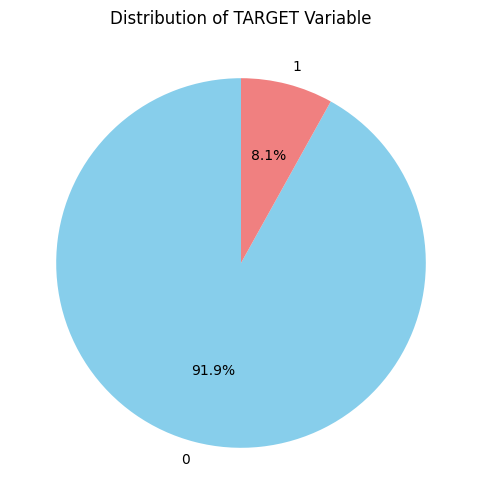

/tmp/ipython-input-3279426853.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', palette='viridis')


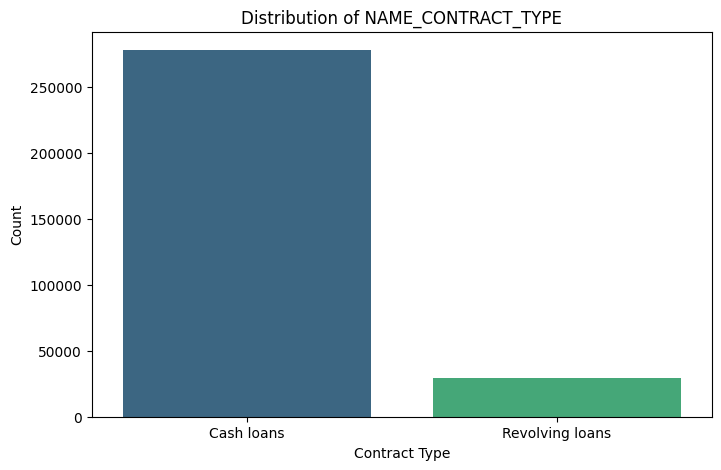

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
df_train['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of TARGET Variable')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', palette='viridis')
plt.title('Distribution of NAME_CONTRACT_TYPE')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-4018067107.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='AUC Score', data=df_scores, palette='viridis')


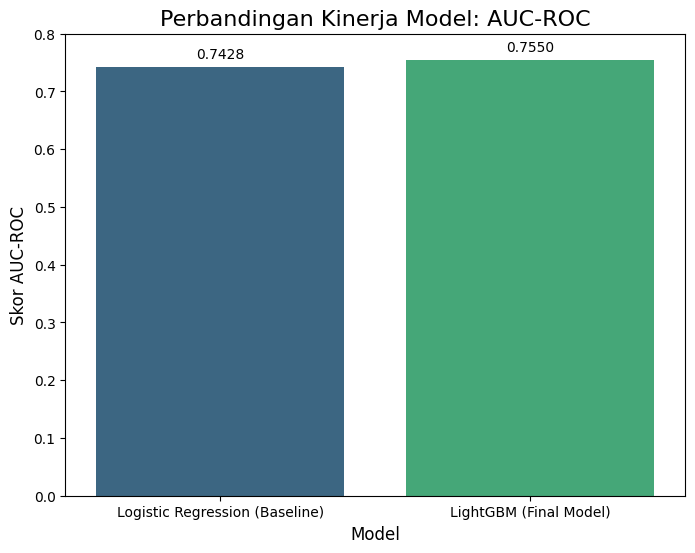

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_scores = {
    'Logistic Regression (Baseline)': 0.7428,
    'LightGBM (Final Model)': 0.7550
}

df_scores = pd.DataFrame(list(model_scores.items()), columns=['Model', 'AUC Score'])

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Model', y='AUC Score', data=df_scores, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

plt.title('Perbandingan Kinerja Model: AUC-ROC', fontsize=16)
plt.ylabel('Skor AUC-ROC', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 0.8)
plt.show()

--- 20 Fitur Paling Berpengaruh ---


,feature,importance
27,EXT_SOURCE_3,446
26,EXT_SOURCE_2,417
2,AMT_CREDIT,372
6,DAYS_BIRTH,365
3,AMT_ANNUITY,346
7,DAYS_EMPLOYED,295
4,AMT_GOODS_PRICE,293
9,DAYS_ID_PUBLISH,261
8,DAYS_REGISTRATION,218
39,DAYS_LAST_PHONE_CHANGE,209


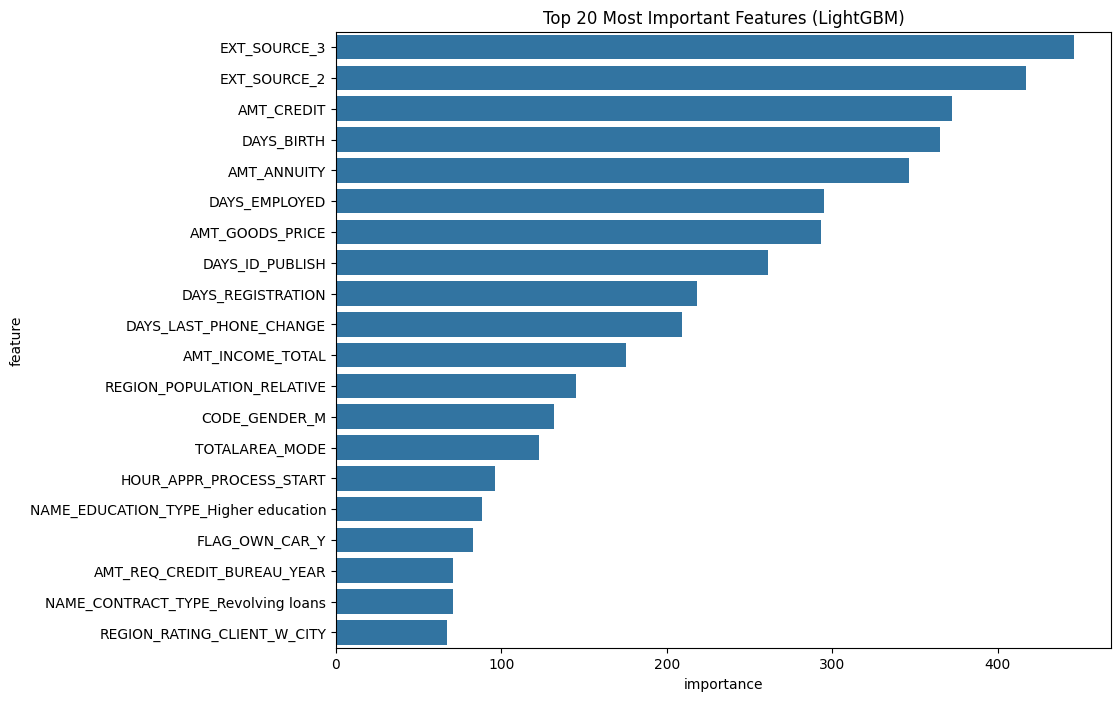

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'feature': features,
    'importance': lgb_clf.feature_importances_
}).sort_values('importance', ascending=False)

top_20_features = feature_importances.head(20)

print("--- 20 Fitur Paling Berpengaruh ---")
display(top_20_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_20_features)
plt.title('Top 20 Most Important Features (LightGBM)')
plt.show()

In [ ]:
features = [col for col in df_train_encoded.columns if col not in ['TARGET', 'SK_ID_CURR']]
X_test = df_test_encoded[features]

X_test_scaled = scaler.transform(X_test)

test_predictions = lgb_clf.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'SK_ID_CURR': df_test_encoded['SK_ID_CURR'], 'TARGET': test_predictions})

submission.to_csv('submission.csv', index=False)

print("File submission.csv berhasil dibuat!")
print("Cek 5 baris pertama:")
print(submission.head())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


File submission.csv berhasil dibuat!
Cek 5 baris pertama:
   SK_ID_CURR    TARGET
0      100001  0.056004
1      100005  0.203712
2      100013  0.020434
3      100028  0.039921
4      100038  0.124078


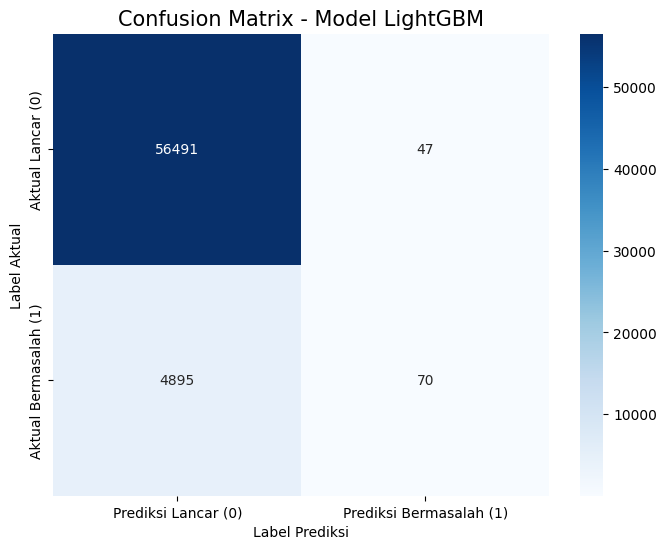

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 0.5
val_predictions_binary = (val_preds_lgb > threshold).astype(int)

cm = confusion_matrix(y_val, val_predictions_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Lancar (0)', 'Prediksi Bermasalah (1)'],
            yticklabels=['Aktual Lancar (0)', 'Aktual Bermasalah (1)'])
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.title('Confusion Matrix - Model LightGBM', fontsize=15)
plt.show()